In [2]:
import pyreadr

result = pyreadr.read_r('./gss.rdata') # also works for Rds
print(result.keys()) 

odict_keys(['gss'])


In [3]:
df = result["gss"]

In [4]:
df.head(5)

,YEAR,WRKSTAT,MARITAL,AGEWED,CHILDS,AGE,EDUC,PAEDUC,MAEDUC,DEGREE,...,ALIKE3,ALIKE4,ALIKE5,ALIKE6,ALIKE7,ALIKE8,AGEWEDCR,HAPUNHAP,REALINC,WORDSUM
0,1972,1,5,NaN,0,23,16,10,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18951,NaN
1,1972,5,1,21,5,70,10,8,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24366,NaN
2,1972,2,1,20,4,48,12,8,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24366,NaN
3,1972,1,1,24,0,27,17,16,12,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30458,NaN
4,1972,7,1,22,2,61,12,8,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50763,NaN


In [5]:
df.count()

YEAR        38116
WRKSTAT     38116
MARITAL     38116
AGEWED      25581
CHILDS      37982
AGE         37981
EDUC        37998
PAEDUC      27401
MAEDUC      31783
DEGREE      37979
PADEG       29531
MADEG       33677
FEMALE      38116
RACE        38116
INCOME      33147
INCOME98     2503
RELIG       38116
FUND        36852
ATTEND      37724
RELITEN     33699
PRAY        15103
PRAYER      19563
BIBLE       14261
HAPPY       38116
ALIKE1       2992
ALIKE2       2992
ALIKE3       2992
ALIKE4       2992
ALIKE5       2992
ALIKE6       2992
ALIKE7       2992
ALIKE8       2992
AGEWEDCR      181
HAPUNHAP     2643
REALINC     32118
WORDSUM     18925
dtype: int64

In [57]:
condition = (df['YEAR'] >= 1990) & (df['YEAR'] < 2000) & (df['AGE'] == 40)& (df['FEMALE'] == 1)
filtered_df = df.loc[condition][['CHILDS', 'DEGREE']].dropna()

In [58]:
filtered_df.describe()

,CHILDS,DEGREE
count,155,155
unique,7,5
top,2,1
freq,51,80


In [54]:
df_low_degree = df_y.loc[(df_y['DEGREE'] < 3)][['CHILDS']]
df_low_degree.describe()

,CHILDS
count,111
unique,7
top,2
freq,38


In [55]:
df_high_degree = df_y.loc[(df_y['DEGREE'] >= 3)][['CHILDS']]
df_high_degree.describe()

,CHILDS
count,44
unique,5
top,2
freq,13


In [60]:
# duoi pho thong
n1 = df_low_degree.count()
y1_sum = df_low_degree['CHILDS'].sum()
print(n1, y1_sum)

CHILDS    111
dtype: int64 217


In [61]:
# tren pho thong
n2 = df_high_degree.count()
y2_sum = df_high_degree['CHILDS'].sum()
print(n2, y2_sum)

CHILDS    44
dtype: int64 66


In [63]:
a = 2
b =1

In [64]:
# duoi pho thong
e1 = (y1_sum + a)/(n1 + b)

# tren pho thong
e2 = (y2_sum + a)/(n2 + b)

print("Ky vong cua hau nghiem ung voi phu nu co trinh do duoi pho thong: ", e1)
print("Ky vong cua hau nghiem ung voi phu nu co trinh do tren pho thong: ", e2)

Ky vong cua hau nghiem ung voi phu nu co trinh do duoi pho thong:  CHILDS    1.955357
dtype: float64
Ky vong cua hau nghiem ung voi phu nu co trinh do tren pho thong:  CHILDS    1.511111
dtype: float64


In [91]:
from scipy.stats import ttest_ind
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'Degree < 3')

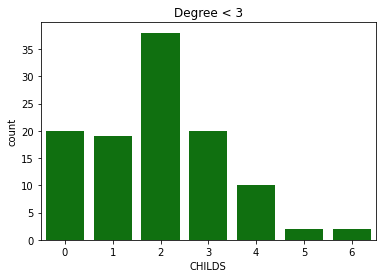

In [87]:
sns.countplot(data=df_low_degree, color='green', x="CHILDS").set_title('Degree < 3')

Text(0.5, 1.0, 'Degree >= 3')

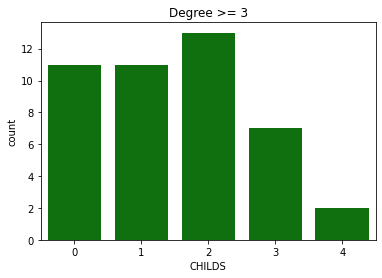

In [88]:
sns.countplot(data=df_high_degree, color="green", x="CHILDS").set_title('Degree >= 3')

In [100]:
from scipy.stats import ttest_ind

In [105]:
stat, p = ttest_ind(df_low_degree['CHILDS'].to_list(), df_high_degree['CHILDS'].to_list(), axis=0)

In [106]:
print(stat, p)

1.9304175709985183 0.055404660390320604
